# (Multiple) Linear Regression:
This Tutorial will illstrate how to build (Multiple) Linear Regression models.

In [80]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

#Ploting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib notebook


## Import the dataset:
In this tutorial, I am using the UCI boston housing price dataset. Find it [here](https://archive.ics.uci.edu/ml/datasets/housing).

In [81]:
def read_sklearn_dataset():
    data = load_boston()
    df_data = pd.DataFrame(data=data['data'], columns=data['feature_names'])
    df_target = pd.DataFrame(data=data['target'], columns=["Target"])
    return df_data, df_target

df_data, df_target = read_sklearn_dataset()

## Feature Selection Steps (in practice):
1- Eliminate the Multicollinearity between the independent variables using: 
* chi-Squared test of independence. 
* variance Inflation Factor test (VIF). 
* using Principal Component Analysis (PCA).

2- Eliminate variables with low statistical significance (2 Approches):
* Before building the model: using forward/backward wrapper based feature selection.
* After building the model: using independent variables significance test (t-statistics)


#### For Now:
I will use the pearson correlation coefficient. The below figur shows a pairwise correlation coefficient between all the attributes in addition to the target variable. By checking the target variable row or column, you could confirm that LSTAT and RM have the highest influence over the target variable as they got the highest absolute coefficient.



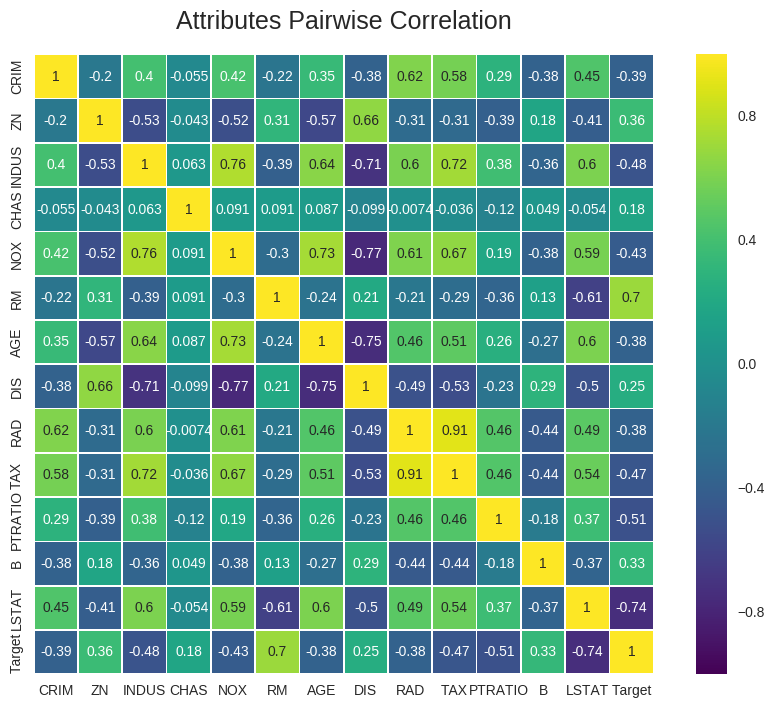

In [82]:
colormap = plt.cm.viridis
plt.figure(figsize=(11,8))
plt.title('Attributes Pairwise Correlation', y=1.03, size=18)
sns.heatmap(pd.concat([df_data, df_target], axis=1).astype(float).corr(),linewidths=0.5, square=True,
            cmap=colormap, linecolor='white',annot=True)
plt.show()



<b> The SEAPORN regression plot </b> can instantly confirms our claims regarding the the most influential attributes (LSTAT, RM).



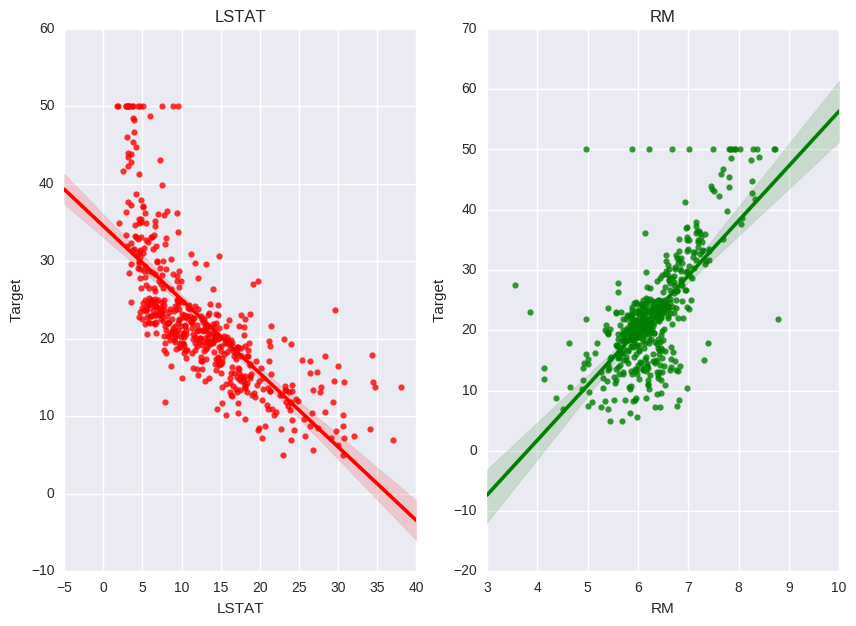

In [83]:
fig = plt.figure(figsize=(10, 7))
plt.subplot(121)
sns.regplot(x=df_data['LSTAT'], y=df_target['Target'], color="r")
plt.title('LSTAT');
plt.subplot(122)
sns.regplot(x=df_data['RM'], y=df_target['Target'], color="g")
plt.title('RM');
plt.show()

### Here is How we can calculate the regression using Normal Equation

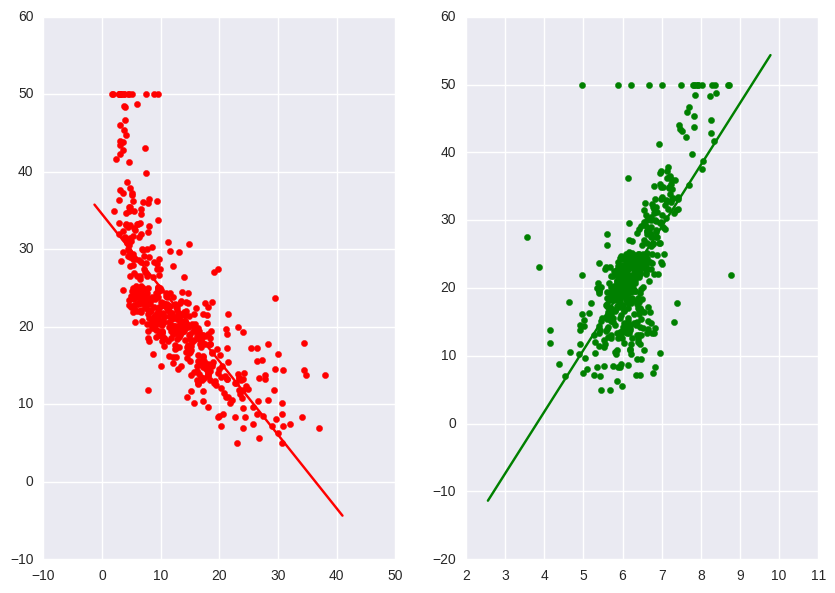

In [84]:
m = len(df_data)
X = np.array([np.ones(m), df_data['LSTAT'].as_matrix()]).T
y = np.array(df_target['Target'])

betaHat = np.linalg.solve(X.T.dot(X), X.T.dot(y))

fig = plt.figure(figsize=(10, 7))
xx = np.linspace(min(df_data['LSTAT'])-3, max(df_data['LSTAT'])+3, 2)
yy = np.array(betaHat[0] + betaHat[1] * xx)

plt.subplot(121)
plt.plot(xx, yy.T, color='r')
plt.scatter(df_data['LSTAT'], df_target['Target'], color='r')


X = np.array([np.ones(m), df_data['RM'].as_matrix()]).T
y = np.array(df_target['Target'])
betaHat = np.linalg.solve(X.T.dot(X), X.T.dot(y))

xx = np.linspace(min(df_data['RM'])-1, max(df_data['RM'])+1, 2)
yy = np.array(betaHat[0] + betaHat[1] * xx)

plt.subplot(122)
plt.plot(xx, yy.T, color='g')
plt.scatter(df_data['RM'], df_target['Target'], color='g')
plt.title('LSTAT');

plt.show()

### Same procedure for multiple linear regression.

<IPython.core.display.Javascript object>


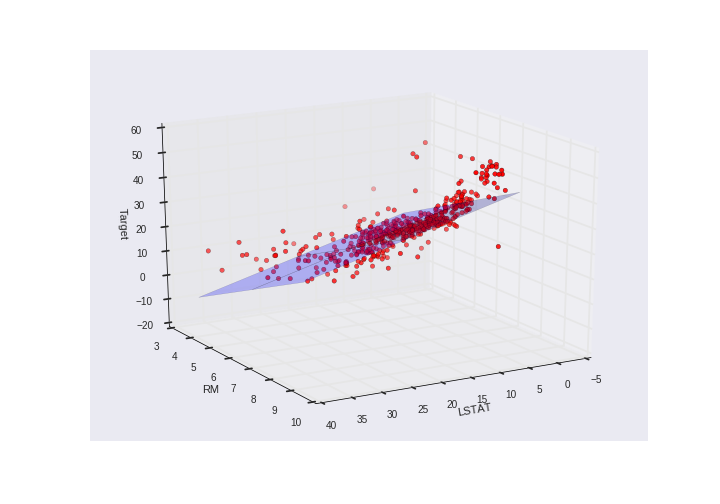

ERROR:root:Line magic function `%qt` not found.


In [79]:
x1 = np.linspace(min(df_data['LSTAT']), max(df_data['LSTAT']), 20)
x2 = np.linspace(min(df_data['RM']), max(df_data['RM']), 20)
X1, X2 = np.meshgrid(x1, x2)

X = np.array([np.ones(m), df_data['LSTAT'].as_matrix(), df_data['RM'].as_matrix()]).T
y = np.array(df_target['Target'])


betaHat = np.linalg.solve(X.T.dot(X), X.T.dot(y))
yy = np.array(betaHat[0] + (X1 * betaHat[1] +  X2 * betaHat[2]))
# F1_score = 2*(X*Y)/(X+Y)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, yy, alpha=0.25)


ax.scatter(df_data['LSTAT'], df_data['RM'], df_target['Target'], c='r');
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('Target')

plt.show()
%qt